In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

In [4]:
w.shape

NameError: name 'w' is not defined

# Computing the Cost Function
Fill in the the `compute_cost` function below:

In [6]:
from grid_search import *

def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    # ***************************************************
    
    # vector e
    e = compute_e(y, tx, w)
    N = compute_N(e)
    L_MSE = np.dot(np.matrix.transpose(e), e)
    L_MSE = L_MSE / (2 * N)
    
    return L_MSE

def compute_e(y, tx, w):
    return (y - np.dot(tx,w))

def compute_N(e):
    return e.shape[0]
    
w = [1,2]
compute_cost(y, tx, w)

2694.4833658870839

# Grid Search

Fill in the function `grid_search()` below:

In [9]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    loss = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    
    for i in range(len(w0)):
        for j in range(len(w1)):
            w = np.array([w0[i], w1[j]])
            loss[i, j] = compute_cost(y, tx, w)
    
    return loss

In [10]:
w0 = [1, 2]
w1 = [2, 3]
grid_search(y, tx, w0, w1)

array([[ 2694.48336589,  2683.50365345],
       [ 2622.68944388,  2611.70973145]])

Let us play with the grid search demo now!

Grid Search: loss*=15.558703368609526, w0*=72.72727272727272, w1*=13.636363636363626, execution time=0.549 seconds


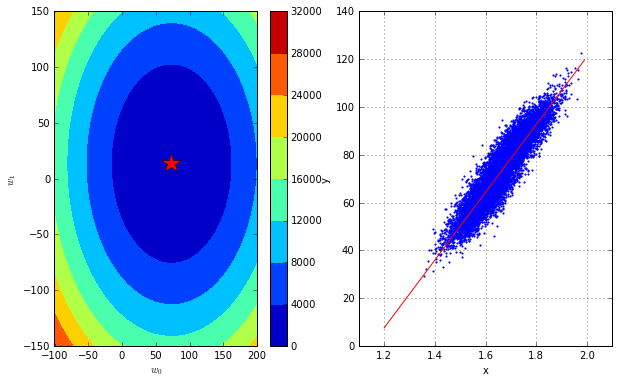

In [11]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [129]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    e = np.array(compute_e(y, tx, w))
    N = compute_N(e)
    tx_transp = np.transpose(tx)
    grad = np.dot(tx_transp, e)
    grad= - grad / N
    
    return grad

In [133]:
w = [100, 20]
print("w = (100, 20)")
print(compute_gradient(y, tx, w))
w = [50, 10]
print("w = (50, 10)")
print(compute_gradient(y, tx, w))

w = (100, 20)
[ 26.706078     6.52028757]
w = (50, 10)
[-23.293922    -3.47971243]


Please fill in the functions `gradient_descent` below:

In [135]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        grad = compute_gradient(y, tx, w)
        loss = compute_cost(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - (gamma * grad)
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [136]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4

# Initialization
w_initial = np.array([0.0, 0.0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591674, w0=29.317568800842082, w1=5.391884973995584
Gradient Descent(1/49): loss=1015.0521848293511, w0=46.90811008134732, w1=8.62701595839293
Gradient Descent(2/49): loss=375.26575477461756, w0=57.462434849650464, w1=10.568094549031375
Gradient Descent(3/49): loss=144.9426399549132, w0=63.795029710632356, w1=11.732741703414439
Gradient Descent(4/49): loss=62.02631861981954, w0=67.59458662722149, w1=12.431529996044276
Gradient Descent(5/49): loss=32.17644293918587, w0=69.87432077717497, w1=12.850802971622183
Gradient Descent(6/49): loss=21.43048769415772, w0=71.24216126714705, w1=13.102366756968927
Gradient Descent(7/49): loss=17.561943805947607, w0=72.06286556113031, w1=13.253305028176975
Gradient Descent(8/49): loss=16.169268006191956, w0=72.55528813752026, w1=13.343867990901805
Gradient Descent(9/49): loss=15.667904718279914, w0=72.85074168335423, w1=13.398205768536702
Gradient Descent(10/49): loss=15.487413934631588, w0=73.02801381085462, w1

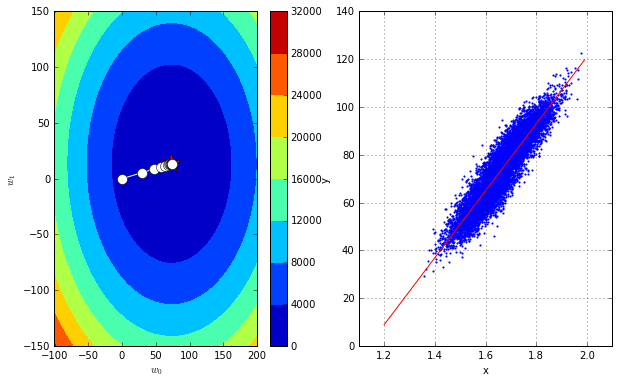

In [137]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# Stochastic gradient descent

In [142]:
a = batch_iter(y, tx, 100, shuffle=True)
print(a)
for minibatch_y, minibatch_tx in batch_iter(y, tx, 32):
    print(minibatch_y)

<generator object batch_iter at 0x10fb3f620>
[ 75.16930663  46.16390647  67.24412254  85.52673636  50.30329002
  52.68957911  47.10904885  89.13396149  93.75815351  86.09104487
  87.48195082  84.42765377  90.71683166  69.38996873  87.19814195
  69.51650881  80.02258047  87.25870384  87.08653994  94.96567205
  73.79755492  55.54055504  59.14597528  63.68104929  55.33744125
  62.20816336  74.4058103   89.89852706  81.06043252  65.15389798
  85.05878823  70.12404693]
[  86.96982666   93.8467561    91.11060848   53.17864844   59.0509701
  108.82253199   85.59234607   76.76277776   85.33627133   75.71413392
   65.90822843   58.46509357   74.43104831   92.26003223   51.38021669
   49.61386399   82.12385779   83.11062836   74.59013011   62.5539823
   80.97841589   83.40697994   60.91882192   76.63320904   63.34330928
   76.54345999   72.72796878   74.89845963   81.58285501   90.80325103
   81.13847378   81.50981696]
[  66.01327407   83.28100513   47.1710193    62.16103313   48.78032966
   71.

In [162]:
def compute_stoch_gradient(y, tx, w, batch_size):
    """Compute a stochastic gradient for batch data."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    stoch_grad = 0
    for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
        stoch_grad = stoch_grad + compute_gradient(minibatch_y, minibatch_tx, w)
        
    stoch_grad = stoch_grad / batch_size
    return stoch_grad


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_epochs, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    # Parameters
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        grad = compute_stoch_gradient(y, tx, w, batch_size)
        loss = compute_cost(y, tx, w)
        w = w - (gamma * grad)
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    
    return losses, ws

In [173]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4
batch_size = 100

# Initialization
w_initial = np.array([0.0, 0.0])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591674, w0=29.31756880084207, w1=5.391884973995587
Gradient Descent(1/49): loss=1015.0521848293513, w0=46.90811008134732, w1=8.62701595839295
Gradient Descent(2/49): loss=375.2657547746175, w0=57.462434849650464, w1=10.568094549031379
Gradient Descent(3/49): loss=144.94263995491318, w0=63.795029710632356, w1=11.73274170341444
Gradient Descent(4/49): loss=62.026318619819556, w0=67.59458662722149, w1=12.43152999604428
Gradient Descent(5/49): loss=32.17644293918586, w0=69.87432077717497, w1=12.850802971622185
Gradient Descent(6/49): loss=21.430487694157716, w0=71.24216126714705, w1=13.102366756968928
Gradient Descent(7/49): loss=17.561943805947603, w0=72.06286556113031, w1=13.253305028176976
Gradient Descent(8/49): loss=16.169268006191956, w0=72.55528813752026, w1=13.343867990901805
Gradient Descent(9/49): loss=15.667904718279914, w0=72.85074168335423, w1=13.398205768536702
Gradient Descent(10/49): loss=15.487413934631588, w0=73.02801381085462, w1=

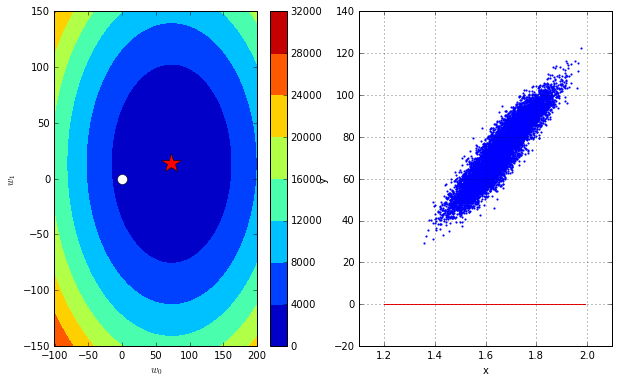

In [174]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))